In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# View all of the classes that automap found
Base.classes.keys()

# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [6]:
# Find the most recent date in the data set.
recent_date = session.query(measurement.date).order_by(measurement.date.desc()).all()
most_recent = recent_date[0]

In [7]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
last_twelve = session.query(measurement.date, measurement.prcp).filter(measurement.date > '2016-08-23').all()
# Calculate the date one year from the last date in data set.

year_ago = dt.date(2017, 8, 23) - dt.timedelta(days=365)
year_ago
# Perform a query to retrieve the data and precipitation scores
data_prec = session.query(measurement.date, measurement.prcp).filter(measurement.date > '2016-08-23').all()
#data_prec

In [8]:
# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date
results = pd.DataFrame(data_prec, columns=["Date", "Precipitation"])
#ts = results.set_index("Date")
#ts 
results

,Date,Precipitation
0,2016-08-24,0.08
1,2016-08-25,0.08
2,2016-08-26,0.00
3,2016-08-27,0.00
4,2016-08-28,0.01
...,...,...
2218,2017-08-19,0.09
2219,2017-08-20,NaN
2220,2017-08-21,0.56
2221,2017-08-22,0.50


<AxesSubplot:xlabel='Date'>

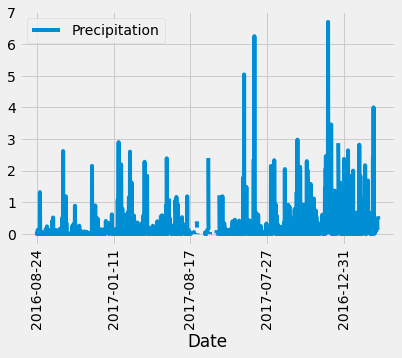

In [9]:
# Use Pandas Plotting with Matplotlib to plot the data

results.plot('Date', 'Precipitation', rot=90)


In [11]:
# Use Pandas to calcualte the summary statistics for the precipitation data
results.describe()

,Precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number stations in the dataset
tot_stations = session.query(func.count(station.station)).all()
tot_stations

[(9,)]

In [13]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
tot_dup_stations = session.query(measurement.station, func.count(measurement.tobs)).group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()
tot_dup_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_max = session.query(func.max(measurement.tobs)).filter(measurement.station == 'USC00519281').all()
most_active_max

[(85.0,)]

In [15]:
most_active_min = session.query(func.min(measurement.tobs)).filter(measurement.station == 'USC00519281').all()
most_active_min

[(54.0,)]

In [16]:
most_active_avg = session.query(func.avg(measurement.tobs)).filter(measurement.station == 'USC00519281').all()
most_active_avg

[(71.66378066378067,)]

In [17]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
most_active = session.query(measurement.station, func.count(measurement.tobs)).group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()[0]
#x = filter(first > '2016-08-23').all()
most_active

('USC00519281', 2772)

In [18]:
most_active_data = session.query(measurement.station, measurement.tobs, measurement.date).filter(measurement.date > '2016-08-23').filter(measurement.station == 'USC00519281').all()
most_active_data
results_most_active_data = pd.DataFrame(most_active_data, columns=["Station", "Tobs", "Date"])
results_most_active_data
results_most_active_data_date = results_most_active_data.set_index("Date")
results_most_active_data_date

,Station,Tobs
Date,,
2016-08-24,USC00519281,77.0
2016-08-25,USC00519281,80.0
2016-08-26,USC00519281,80.0
2016-08-27,USC00519281,75.0
2016-08-28,USC00519281,73.0
...,...,...
2017-08-14,USC00519281,77.0
2017-08-15,USC00519281,77.0
2017-08-16,USC00519281,76.0


<AxesSubplot:ylabel='Frequency'>

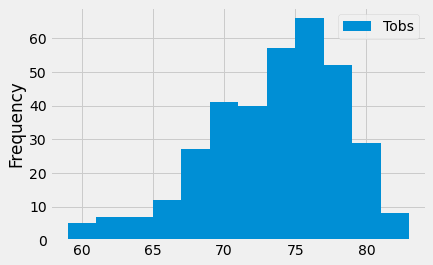

In [19]:
results_most_active_data_date.plot.hist(bins=12)

# Close session

In [20]:
# Close Session
session.close()